In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
#from matplotlib import pyplot as plt



Cut size is : 4
Partition 1 : [ 4  5  6  7  8  9 14 15 16]
Partition 2 : [ 0  1  2  3 10 11 12 13 17]


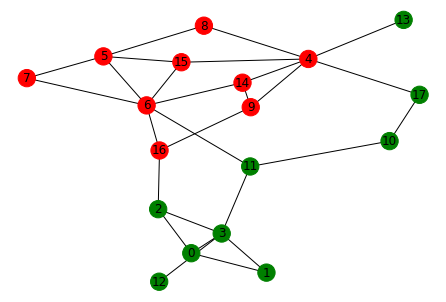

In [ ]:

data = pd.read_csv("graph.txt", sep = ' ')
#Number of vertices
n = max(list(data.max())) 
#print(n)
#Adj matrix
A = np.zeros((n+1, n+1))

#Creating adjacency matrix from given list
for i in range(data.shape[0]): 
    x = data.iloc[i,0] 
    y = data.iloc[i,1] 
    A[x,y] = 1
    A[y,x] = 1
    
#Listing vertices
v = list(range(n+1))

#Dividing nodes in random n1 n2 groups
random.shuffle(v)
cut = int((n+1)/2)
n1, n2 = np.sort(v[:cut]), np.sort(v[cut:])
pairs = len(n1)*len(n2) 

def cut_size(n1, n2):
    r_old = 0
    for i in n1:
        for j in n2:
            if A[i][j] == 1:
                r_old = r_old + 1
    return (r_old)

def best_swap(n1 ,n2):      
#Will check change in delR for all pairs and will swap pair with optimal cut size 
#And return best partition and its cut size
    mark = []
    partition = []
    cut_s = []
    while(len(mark) != pairs-1):
        r_best, ij, part = [], [], []
        r_old = cut_size(n1, n2)
        for i in range(len(n1)):
            for j in range(len(n2)):
                if ([n1[i],n2[j]] not in mark and ([n2[j],n1[i]] not in mark)):
                    n11, n22 = n1.copy(), n2.copy()
                    n11[i] = n2[j]
                    n22[j] = n1[i]
                    del_R = r_old - cut_size(n11, n22) #Change in cut size
                    r_best.append(del_R)
                    part.append([n11, n22])
                    ij.append([n11[i],n22[j]])
            
        a = np.argmax(r_best)
        c_part = part[a]
        partition.append(c_part)
        mark.append(ij[a])
        cut_s.append(cut_size(c_part[0], c_part[1]))
        n1, n2 = c_part[0], c_part[1]
    return(cut_s[np.argmin(cut_s)], partition[np.argmin(cut_s)])
    
def kernighan_lin(n1, n2):
    cs = []
    for i in range(1):      #Iterations
        CutSize, partition = best_swap(n1, n2)
        n1 = partition[0]
        n2 = partition[1]
        cs.append(CutSize)
        if len(cs) >= 10:       #Checking if cut size is converging
            ts = cs[-5:]
            if (ts[0]==ts[1]==ts[2]==ts[3]==ts[4]):
                break
    return(CutSize, partition)

c, p = kernighan_lin(n1, n2)
p1, p2 = np.sort(p[0]), np.sort(p[1])
print("\nCut size is : {}".format(c))
print("Partition 1 : {}".format(p1))
print("Partition 2 : {}".format(p2))

grp1 = p[0]
grp2 = p[1]

G = nx.Graph()

for i in range(len(data)):
     G.add_edge(data.iloc[i,0],data.iloc[i,1])

for n in G.nodes():
    G.nodes[n]['color'] = 'r' if n in grp1 else 'g'
    
colors = [node[1]['color'] for node in G.nodes(data=True)]
nx.draw(G, with_labels=True, node_color=colors)


Cut size is : 1
Partition 1 : [4 5 7 8]
Partition 2 : [0 1 2 3 6]


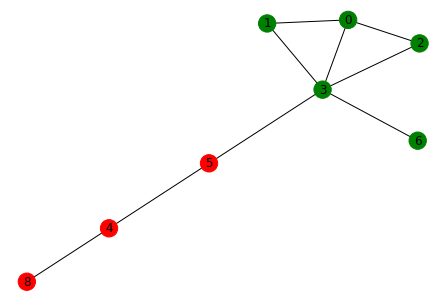

In [ ]:

data = pd.read_csv("part1.txt", sep = ' ')
#Number of vertices
n = max(list(data.max())) 
#print(n)
#Adj matrix
A = np.zeros((n+1, n+1))

#Creating adjacency matrix from given list
for i in range(data.shape[0]): 
    x = data.iloc[i,0] 
    y = data.iloc[i,1] 
    A[x,y] = 1
    A[y,x] = 1
    
#Listing vertices
v = list(range(n+1))

#Dividing nodes in random n1 n2 groups
random.shuffle(v)
cut = int((n+1)/2)
n1, n2 = np.sort(v[:cut]), np.sort(v[cut:])
pairs = len(n1)*len(n2) 

def cut_size(n1, n2):
    r_old = 0
    for i in n1:
        for j in n2:
            if A[i][j] == 1:
                r_old = r_old + 1
    return (r_old)

def best_swap(n1 ,n2):      
#Will check change in delR for all pairs and will swap pair with optimal cut size 
#And return best partition and its cut size
    mark = []
    partition = []
    cut_s = []
    while(len(mark) != pairs-1):
        r_best, ij, part = [], [], []
        r_old = cut_size(n1, n2)
        for i in range(len(n1)):
            for j in range(len(n2)):
                if ([n1[i],n2[j]] not in mark and ([n2[j],n1[i]] not in mark)):
                    n11, n22 = n1.copy(), n2.copy()
                    n11[i] = n2[j]
                    n22[j] = n1[i]
                    del_R = r_old - cut_size(n11, n22) #Change in cut size
                    r_best.append(del_R)
                    part.append([n11, n22])
                    ij.append([n11[i],n22[j]])
            
        a = np.argmax(r_best)
        c_part = part[a]
        partition.append(c_part)
        mark.append(ij[a])
        cut_s.append(cut_size(c_part[0], c_part[1]))
        n1, n2 = c_part[0], c_part[1]
    return(cut_s[np.argmin(cut_s)], partition[np.argmin(cut_s)])
    
def kernighan_lin(n1, n2):
    cs = []
    for i in range(1):      #Iterations
        CutSize, partition = best_swap(n1, n2)
        n1 = partition[0]
        n2 = partition[1]
        cs.append(CutSize)
        if len(cs) >= 10:       #Checking if cut size is converging
            ts = cs[-5:]
            if (ts[0]==ts[1]==ts[2]==ts[3]==ts[4]):
                break
    return(CutSize, partition)

c, p = kernighan_lin(n1, n2)
p1, p2 = np.sort(p[0]), np.sort(p[1])
print("\nCut size is : {}".format(c))
print("Partition 1 : {}".format(p1))
print("Partition 2 : {}".format(p2))

grp1 = p[0]
grp2 = p[1]

G = nx.Graph()

for i in range(len(data)):
     G.add_edge(data.iloc[i,0],data.iloc[i,1])

for n in G.nodes():
    G.nodes[n]['color'] = 'r' if n in grp1 else 'g'
    
colors = [node[1]['color'] for node in G.nodes(data=True)]
nx.draw(G, with_labels=True, node_color=colors)


Cut size is : 4
Partition 1 : [0 1 4 7]
Partition 2 : [2 3 5 6 8]


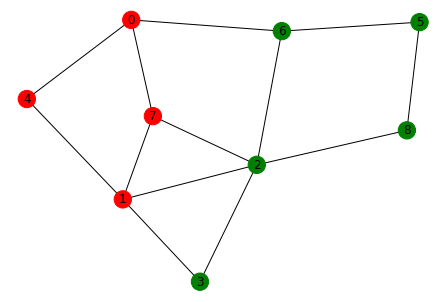

In [ ]:


data = pd.read_csv("part2.txt", sep = ' ')
#Number of vertices
n = max(list(data.max())) 
#print(n)
#Adj matrix
A = np.zeros((n+1, n+1))

#Creating adjacency matrix from given list
for i in range(data.shape[0]): 
    x = data.iloc[i,0] 
    y = data.iloc[i,1] 
    A[x,y] = 1
    A[y,x] = 1
    
#Listing vertices
v = list(range(n+1))

#Dividing nodes in random n1 n2 groups
random.shuffle(v)
cut = int((n+1)/2)
n1, n2 = np.sort(v[:cut]), np.sort(v[cut:])
pairs = len(n1)*len(n2) 

def cut_size(n1, n2):
    r_old = 0
    for i in n1:
        for j in n2:
            if A[i][j] == 1:
                r_old = r_old + 1
    return (r_old)

def best_swap(n1 ,n2):      
#Will check change in delR for all pairs and will swap pair with optimal cut size 
#And return best partition and its cut size
    mark = []
    partition = []
    cut_s = []
    while(len(mark) != pairs-1):
        r_best, ij, part = [], [], []
        r_old = cut_size(n1, n2)
        for i in range(len(n1)):
            for j in range(len(n2)):
                if ([n1[i],n2[j]] not in mark and ([n2[j],n1[i]] not in mark)):
                    n11, n22 = n1.copy(), n2.copy()
                    n11[i] = n2[j]
                    n22[j] = n1[i]
                    del_R = r_old - cut_size(n11, n22) #Change in cut size
                    r_best.append(del_R)
                    part.append([n11, n22])
                    ij.append([n11[i],n22[j]])
            
        a = np.argmax(r_best)
        c_part = part[a]
        partition.append(c_part)
        mark.append(ij[a])
        cut_s.append(cut_size(c_part[0], c_part[1]))
        n1, n2 = c_part[0], c_part[1]
    return(cut_s[np.argmin(cut_s)], partition[np.argmin(cut_s)])
    
def kernighan_lin(n1, n2):
    cs = []
    for i in range(1):      #Iterations
        CutSize, partition = best_swap(n1, n2)
        n1 = partition[0]
        n2 = partition[1]
        cs.append(CutSize)
        if len(cs) >= 10:       #Checking if cut size is converging
            ts = cs[-5:]
            if (ts[0]==ts[1]==ts[2]==ts[3]==ts[4]):
                break
    return(CutSize, partition)

c, p = kernighan_lin(n1, n2)
p1, p2 = np.sort(p[0]), np.sort(p[1])
print("\nCut size is : {}".format(c))
print("Partition 1 : {}".format(p1))
print("Partition 2 : {}".format(p2))

grp1 = p[0]
grp2 = p[1]

G = nx.Graph()

for i in range(len(data)):
     G.add_edge(data.iloc[i,0],data.iloc[i,1])

for n in G.nodes():
    G.nodes[n]['color'] = 'r' if n in grp1 else 'g'
    
colors = [node[1]['color'] for node in G.nodes(data=True)]
nx.draw(G, with_labels=True, node_color=colors)